<a href="https://colab.research.google.com/github/iniyan1984/HalfDayHacking/blob/main/sampling_a_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW: Probability, Sampling, and the Central Limit Theorem

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. 

## Probability as symmetry, or from a model

### Symmetry

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.



### From a model

But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelihood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. 

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 

## Probability as frequency

The example above of doing multiple symbols has the feel of defining probability in terms of frequency, even if the frequency is in terms of simulations run in code on a computer.

Consider doing a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

This is the notion of probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

This jibes with our general notion of probability from symmetry: indeed you can think of it as an experimental verification of a symmetry based model.

We can test the model of a fair coin by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

### Q1. Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6).

Implement a function `throw_a_coin(N)` which returns a sequence of N coin tosses, with each toss either being a 'H' or a 'T' (with equal probability). So a sequence of 40 tosses may look like:

```
T T H H T T T H T H T H T T H T H T T H H T T H T T H T T H H H H T H T H H T T
```

In [1]:
import numpy as np
# your code here
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)

We use your code here to make 40 coin tosses:

In [2]:
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H H H H H H H T T T H H H T T T H H H H H H T H H T T H T T H H T H H H H T T T
Number of Heads: 25
p1 = Number of Heads/Total Throws: 0.625


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [4]:
def make_throws(N):
    throws=throw_a_coin(N)
    return np.sum(throws=='H')/N # or np.mean(throws=='H')
make_throws(40)

0.425

Our intuitive notion is that as we do many more trials, we should find half the tosses being heads

In [5]:
make_throws(1000)

0.492

In [6]:
make_throws(10000)

0.4971

As you can see, the larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically by making a matplotlib plot. Construct an array of trials from 0 to 400000 in steps of 1000:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
trials=np.arange(0, 400000, 1000)
trials.shape

(400,)

### Q2: Plot the fraction of heads against the number of trials. Plot a horizontal red line at 0.5

For each entry in trials, call `make_throws` and plot the resulting array of fractions (lets call this array `trials_fractions`) against the trials array.

We are assuming H and T are equally likely, so the probability by symmetry is 1/2, and we wantt to see how this probability is approached in the long run of "infinite" coin tosses.

Make sure you label your axes and title your graph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


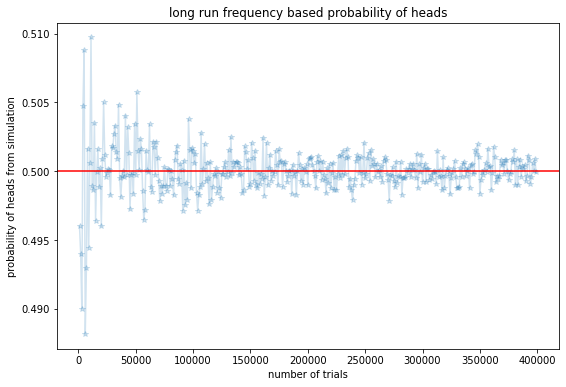

In [9]:
trials_fractions = [make_throws(j) for j in trials]
# your code here

plt.figure(figsize=(9,6))
plt.plot(trials, trials_fractions, '*-', alpha=0.2);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('long run frequency based probability of heads');

You will see, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller. These **fluctations** are what give rise to probability distributions.


## The law of large numbers

This convergence of the fractions to the value of 0.5 is called the law of large numbers. The 0.5 value is the mean of a "Bernoulli" Distribution, the distribuion for *one* coin toss. The fractions are really running averages:

$$ S_n = \frac{1}{n}\sum_{i=1}^{n} x_i $$

where x_i is either H or T (1 or 0).

### The Discrete Bernoulli Distribution

The distribution for 1 `coin toss` is called the Bernoulli.

We have been using this so far both in elecctions and in coin-tosses withour talking about it formally.

Say a coin flip represented as $X$, where $X=1$ is heads, and $X=0$ is tails. The parameter is probability of heads $p$.

$$X \sim Bernoulli(p)$$

is to be read as $$X$$ **has distribution** $Bernoulli(p)$.


Bernoulli pmf:

$$
f(x) =
\begin{cases}
1 - p & x = 0\\
p & x = 1.
\end{cases}
$$

for p in the range 0 to 1.

$$f(x) = p^x (1-p)^{1-x}$$

for x in the set {0,1}.

On Python distributions can be obtained from `numpy.random` or `scipy.stats`

In any model, there are multiple sources of fluctuations. One of these is...

## Sampling error

Asking a human to do more than a 1000 coin tosses might result in that human rebelling. Thus we might be only be able to ask a person to toss 1000 coins. Thus there is some sampling error in their probability estimates. But if we had asked another person to do 1000 tosses, their answers would be somewhat different. These are the fluctuations we talked about, and the error away from the long term tendency, also called the "population" tendency, is called sampling error.

### Samples from a population of coin flips

We'll establish some terminology at first. What we'll do different here is to do a large set of **replications** M, in each of which we did many coin flips, or **observations** N.  We'll call **a single replication a sample of observations**. Thus the number of samples is M, and the sample size is N. 

![](https://github.com/iniyan1984/HalfDayHacking/blob/main/images/grid.png?raw=1)

Remember that each of these samples have been chosen from a population of size $n >> N$. The 1000 coin tosses from an infinite population so as to not tire the humans.

We'll now calculate the mean over the observations in a single sample, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

### Q3. Lets write a function to create this code here

Create a function `replicate_throws(number_of_samples, sample_size)`. Loop over the samples, throw `sample_size` coin tosses, and calculate the mean of each sample. Return these means. (your returned array will thus be of size `number_of_samples`

In [ ]:
# your code here
def replicate_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:] = throw_a_coin(sample_size) == 'H'
    return np.mean(start, axis=1)

In [ ]:
replicate_throws(number_of_samples=20, sample_size=10)

array([0.5, 0.4, 0.6, 0.4, 0.3, 0.5, 0.6, 0.7, 0.4, 0.5, 0.7, 0.3, 0.6,
       0.5, 0.5, 0.4, 0.6, 0.4, 0.3, 0.6])

Now lets do 100 samples of 500 coin tosses:

In [ ]:
throw_fractions = replicate_throws(number_of_samples=100, sample_size=500)

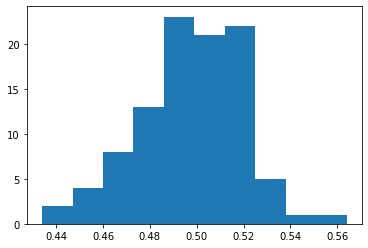

In [ ]:
plt.hist(throw_fractions);

As you can see, there are samples with as many as 56% heads in this experiment. 

What hapens if you increase the sample size?

In [ ]:
throw_fractions = replicate_throws(number_of_samples=200, sample_size=1000)

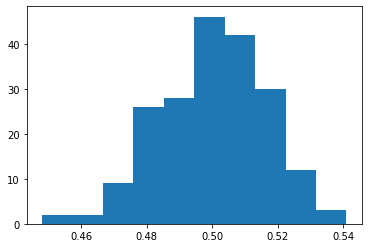

In [ ]:
plt.hist(throw_fractions);

This is a tighter histogram as you might expect! More coin tosses in a sample, less the uncertainty due to sampling.


### Q4 multiple replications with multiple sample sizes

Let us now do these 200 replications, but this time and store the 200 means for each sample size from 1 to 10001 (in strides of 100, `np.arange(1,10001,100)`) in `sample_means`. This should be a 2D array of 200 rows corresponding to the 200 replications and 100 columns corresponding to the shape of `sample_sizes` below.

In [ ]:
sample_sizes=np.arange(1,10001,100)
sample_sizes.shape

(100,)

In [ ]:
sample_sizes

array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901, 3001, 3101, 3201,
       3301, 3401, 3501, 3601, 3701, 3801, 3901, 4001, 4101, 4201, 4301,
       4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401,
       5501, 5601, 5701, 5801, 5901, 6001, 6101, 6201, 6301, 6401, 6501,
       6601, 6701, 6801, 6901, 7001, 7101, 7201, 7301, 7401, 7501, 7601,
       7701, 7801, 7901, 8001, 8101, 8201, 8301, 8401, 8501, 8601, 8701,
       8801, 8901, 9001, 9101, 9201, 9301, 9401, 9501, 9601, 9701, 9801,
       9901])

The next cell is yours to write. Its output should be a 200 x 100 array, with rows the means at different sample sizes for different replications. Yoour strategy to fill this 2D array will be to go column by colum and use `replicate_throws` to fill the 200 means for a given sample size in each column.

In [ ]:
# your code here
sample_means = np.zeros((200, sample_sizes.shape[0]))
for i, sample_size in enumerate(sample_sizes):
    sample_means[:,i] = replicate_throws(number_of_samples=200, sample_size=sample_size)

In [ ]:
sample_means.shape # should be 200 x 100

(200, 100)

This is now a set of 200 sample means at each sample size. Lets create an array of "means of sample means"

In [ ]:
mean_of_sample_means = np.mean(sample_means, axis=0)

Now let us plot these:

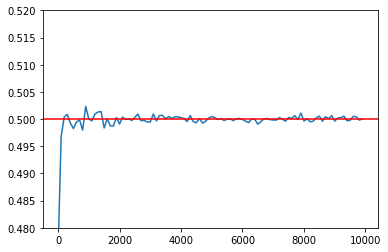

In [ ]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.axhline(0.5, 0, 1, color="r")

We can see that the mean of sample means (as opposed to just the sample mean) also gets closer to 0.5. What does the distribution of means look like? Leets see this at the highest sample size (9901), thus the last column in the sample_means array:

(array([ 2.,  5., 18., 26., 47., 51., 32., 10.,  7.,  2.]),
 array([0.48479952, 0.48783961, 0.49087971, 0.49391981, 0.4969599 ,
        0.5       , 0.5030401 , 0.50608019, 0.50912029, 0.51216039,
        0.51520048]),
 <a list of 10 Patch objects>)

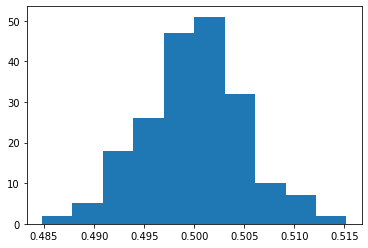

In [ ]:
plt.hist(sample_means[:,-1])

This distribution (in the infinite sample size limit) if called the "Sampling distribution of the Sample Mean", as for each replication, we did 9901 (large enough) coin tosses. We calculated the mean of those coin tosses, and plotted the distribution here. The mean of this distribution is, of course:

In [ ]:
mean_of_sample_means[-1]

0.5000161599838399

This is the: 

### The Gaussian Distribution

The sampling distribution of the mean itself has a mean $\mu$ and variance $s^2$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{s\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

$s$ is called the **standard error**.

Veeeeery close to 0.5, as expected. 

### Q5: Tightening of the distribution

But how do these distributions vary at different sample sizes? Plot the distribution of 200 means at 3 different sample sizes: 501, 5001, and 9901 in the same figure. You will need to figure the index corresponding to this (use `zip` and `dict`) and get the three columns out from `sample_means`. Use labels and a legend.

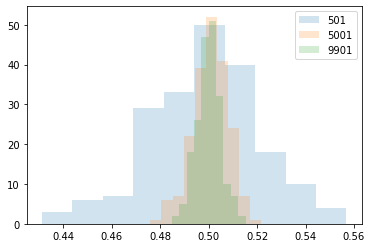

In [ ]:
# your code here
lookup = dict(zip(sample_sizes, range(100)))
for i in [501, 5001, 9901]:
    index = lookup[i]
    column = sample_means[:,index]
    plt.hist(column, alpha=0.2, label=str(i))
plt.legend();

You will notice an immense tightening of the distributions. By how much? To do this lets create an array for the standard deviation of the distributions, also known in statiostical parlance as the **standard error**:

In [ ]:
stddev_of_sample_means = np.std(sample_means, axis=0)

### Q6: Plot the log of this array agains the log of the sample sizes.

You can use `np.log10`. This function can be applied directly to arrays: this is akin to what we did when we added two arrays. it will apply the function elementwise.

In [ ]:
np.log10(stddev_of_sample_means)

array([-0.30157354, -1.30010726, -1.48428314, -1.52525092, -1.5949349 ,
       -1.64393038, -1.67750625, -1.7505508 , -1.73704054, -1.78668616,
       -1.79841103, -1.81922631, -1.81479094, -1.86536957, -1.84861455,
       -1.90202731, -1.873269  , -1.91671085, -1.9538549 , -1.95738671,
       -1.98749534, -1.98314069, -1.98409935, -1.99975862, -1.97803228,
       -2.05711651, -2.02573709, -2.01734812, -2.0161149 , -2.05200698,
       -2.04221185, -2.04637011, -2.03327763, -2.07149924, -2.07450125,
       -2.08632258, -2.09366575, -2.10477258, -2.104479  , -2.11426142,
       -2.07958553, -2.11940386, -2.10202258, -2.16019165, -2.13050306,
       -2.11034301, -2.12659414, -2.11084566, -2.16000325, -2.1361024 ,
       -2.1429317 , -2.16458331, -2.19424943, -2.14621777, -2.20698294,
       -2.19023883, -2.13550529, -2.14586537, -2.19255529, -2.16496406,
       -2.18513351, -2.22347818, -2.20865838, -2.21939292, -2.19788365,
       -2.2046897 , -2.20917797, -2.20451887, -2.23626223, -2.23

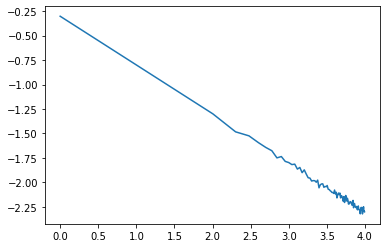

In [ ]:
# your code here
plt.plot(np.log10(sample_sizes), np.log10(stddev_of_sample_means));

Its a straight line. If you look catefully, its slope is -0.5, telling us that:

$$Standard Error \propto \frac{1}{\sqrt{N}}$$

where $N$ is the sample size.

This gets us to the:

## The Central Limit Theorem

The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.